### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

The data set has 12684 rows of data and 26 columns. 

In [6]:
print(data.shape)

(12684, 26)


In [166]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

We find that there are 8 numeric variables. 

In [5]:
# Finding missing data (Nan)
column_names = data.columns.tolist()
num_nanvals = {}
for col_name in column_names:
    nan_values = data[data[col_name].isna()]
    num_rows_na = nan_values.shape
    num_nanvals[col_name] = num_rows_na[0]
print(num_nanvals)

{'destination': 0, 'passanger': 0, 'weather': 0, 'temperature': 0, 'time': 0, 'coupon': 0, 'expiration': 0, 'gender': 0, 'age': 0, 'maritalStatus': 0, 'has_children': 0, 'education': 0, 'occupation': 0, 'income': 0, 'car': 12576, 'Bar': 107, 'CoffeeHouse': 217, 'CarryAway': 151, 'RestaurantLessThan20': 130, 'Restaurant20To50': 189, 'toCoupon_GEQ5min': 0, 'toCoupon_GEQ15min': 0, 'toCoupon_GEQ25min': 0, 'direction_same': 0, 'direction_opp': 0, 'Y': 0}


We find that the in the column 'car', almost the entire data set has NaN values.Hence, it would be preferable to remove this column from any analysis. The other columns like Bar, CoffeeeHouse, CarryAway, RestaurentlessThan20, Restaurent20To50 have around ~1-2% NaNs. We can factor-in this either by imputing the data or eliminating those rows. 

In [10]:
#Basic statistical analysis of data 
data.describe()   #Statistical details of numeric variable of the data


,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# Finding missing data (null)
column_names = data.columns.tolist()
num_nullvals = {}
for col_name in column_names:
    null_values = data[data[col_name].isnull()]
    num_rows_null = null_values.shape
    num_nullvals[col_name] = num_rows_null[0]
print(num_nullvals)

{'destination': 0, 'passanger': 0, 'weather': 0, 'temperature': 0, 'time': 0, 'coupon': 0, 'expiration': 0, 'gender': 0, 'age': 0, 'maritalStatus': 0, 'has_children': 0, 'education': 0, 'occupation': 0, 'income': 0, 'car': 12576, 'Bar': 107, 'CoffeeHouse': 217, 'CarryAway': 151, 'RestaurantLessThan20': 130, 'Restaurant20To50': 189, 'toCoupon_GEQ5min': 0, 'toCoupon_GEQ15min': 0, 'toCoupon_GEQ25min': 0, 'direction_same': 0, 'direction_opp': 0, 'Y': 0}


3. Decide what to do about your missing data -- drop, replace, other...

In [408]:
# removing the column cars

# 1. dropping all the NaN/Null rows
datanocar = data.drop('car',1)
datanocar = datanocar.dropna()
print("The number of rows after dropping NaN is: ",datanocar.shape)

The number of rows after dropping NaN is:  (12079, 25)


C:\Users\karavi01\AppData\Local\Temp/ipykernel_19340/4030152782.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  datanocar = data.drop('car',1)


In [314]:
#New data frame with dropped NaN data and car column removed
datanocar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


We lose around 5% of our data by dropping all the NaN values. 

In [316]:
#Removing car from num_nanvals library to impute data .pop() method.
num_nanvals.pop('car', None)
print(num_nanvals)

{'destination': 0, 'passanger': 0, 'weather': 0, 'temperature': 0, 'time': 0, 'coupon': 0, 'expiration': 0, 'gender': 0, 'age': 0, 'maritalStatus': 0, 'has_children': 0, 'education': 0, 'occupation': 0, 'income': 0, 'Bar': 107, 'CoffeeHouse': 217, 'CarryAway': 151, 'RestaurantLessThan20': 130, 'Restaurant20To50': 189, 'toCoupon_GEQ5min': 0, 'toCoupon_GEQ15min': 0, 'toCoupon_GEQ25min': 0, 'direction_same': 0, 'direction_opp': 0, 'Y': 0}


In [40]:
# 2. Imputing data
datanocarimpute=data.drop('car',1)
for col_name in num_nanvals:
    if num_nanvals[col_name]>0:
        mostFreqVal = datanocarimpute[col_name].value_counts().index.tolist()[:1]
        datanocarimpute.fillna(value=mostFreqVal[0], inplace=True)

C:\Users\karavi01\AppData\Local\Temp/ipykernel_19340/3647163210.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  datanocarimpute=data.drop('car',1)


In [315]:
#New data frame with imputed data and car column removed
datanocarimpute.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0


4. What proportion of the total observations chose to accept the coupon? 



In [317]:
#Obtaining statistical information with describe() on dropped NaN DF and imputed values DF
print("The basic statistical information on the Data after dropping missing values", datanocar['Y'].describe())
print("The basic statistical information on the Data after imputing the missing values", datanocarimpute['Y'].describe())


The basic statistical information on the Data after dropping missing values count    12079.000000
mean         0.569335
std          0.495190
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Y, dtype: float64
The basic statistical information on the Data after imputing the missing values count    12684.000000
mean         0.568433
std          0.495314
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Y, dtype: float64


Around 57% of the total observation have accepted the coupons. Imputing or dropping the missing values doesnot change the proportion of acceptance of coupon. 

<AxesSubplot:xlabel='age', ylabel='Count'>

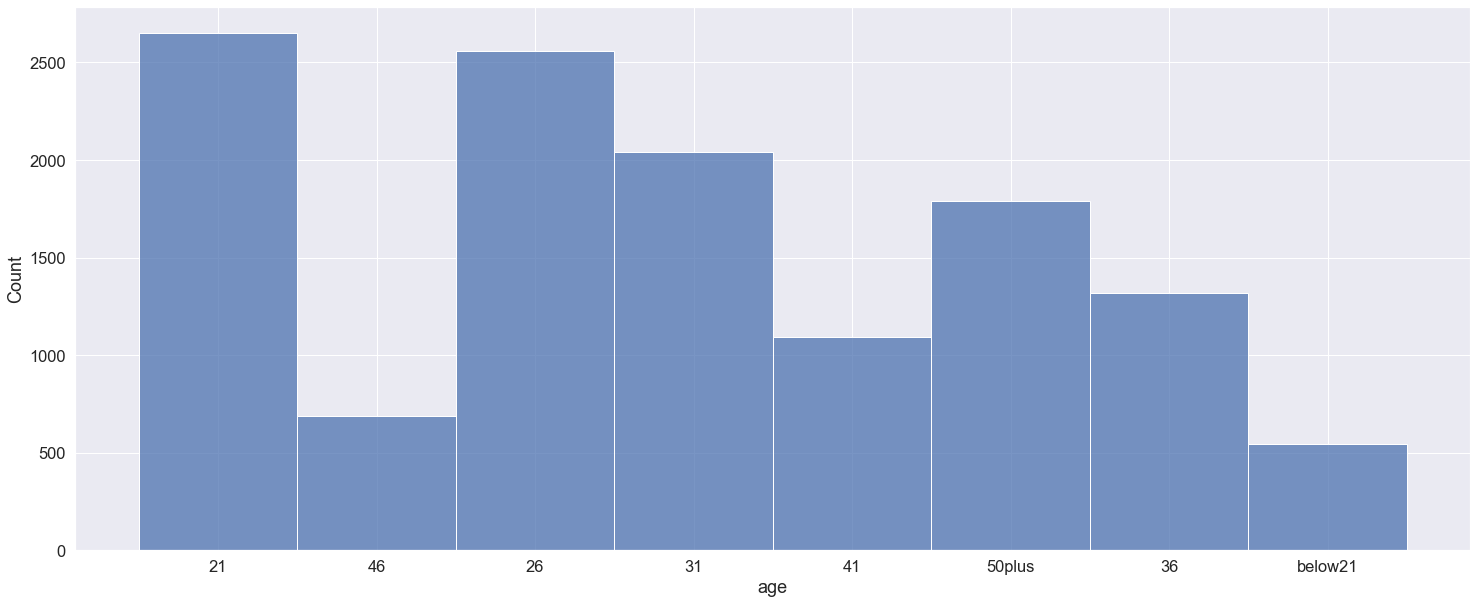

In [438]:
sns.histplot(data = datanocar, x=data['age'])

Independent Q: What proportion of the total people are male/female chose to in population?

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

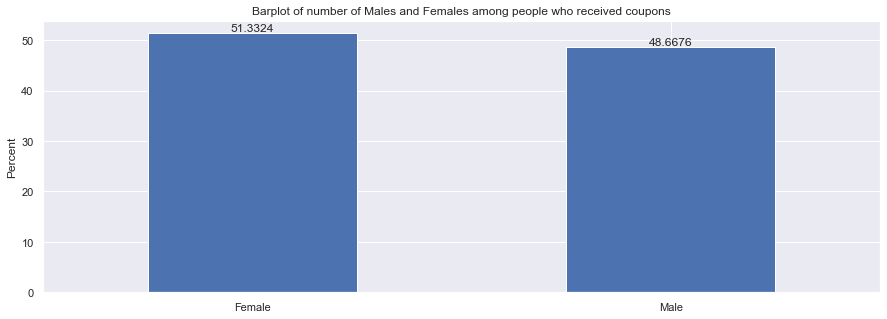

In [337]:
#Obtaining information of how many of the people who received coupons are male/female using visulaisation using Pandas
ax=(datanocarimpute['gender'].value_counts(normalize=True, sort=False)*100).plot.bar()
ax.set(ylabel="Percent")
ax.bar_label(ax.containers[0])
plt.title("Barplot of number of Males and Females among people who received coupons")
plt.xticks(rotation=0, horizontalalignment="center")

The gender distribution in this dataset is even.

<AxesSubplot:xlabel='Y', ylabel='Percentage'>

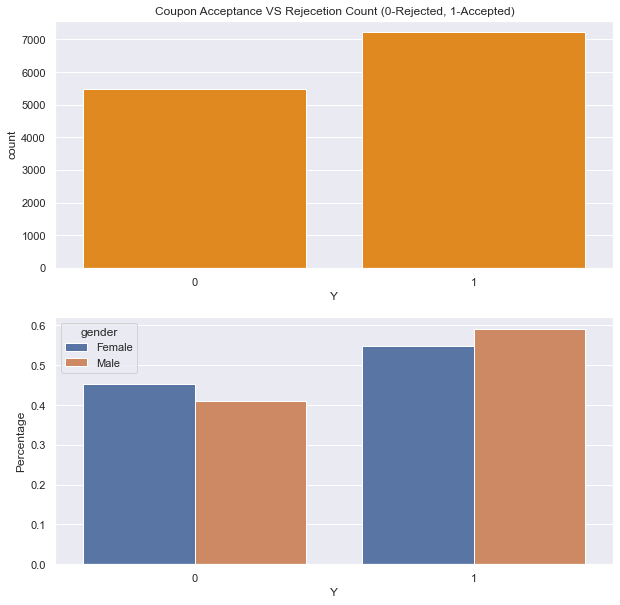

In [335]:
fig, couponacceptanceplot = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(data = datanocarimpute, x="Y",ax = couponacceptanceplot[0],color="darkorange").set_title('Coupon Acceptance VS Rejecetion Count (0-Rejected, 1-Accepted)')
(datanocarimpute["Y"]
 .groupby(datanocarimpute['gender'])
 .value_counts(normalize=True)
 .rename('Percentage')
 .reset_index()
 .pipe((sns.barplot, "data"), x='Y', y='Percentage', hue='gender',ax = couponacceptanceplot[1]))

Coupon is accepted slightly more by MEN, while rejection is slightly more prevalent among WOMEN.

5. Use a bar plot to visualize the `coupon` column.

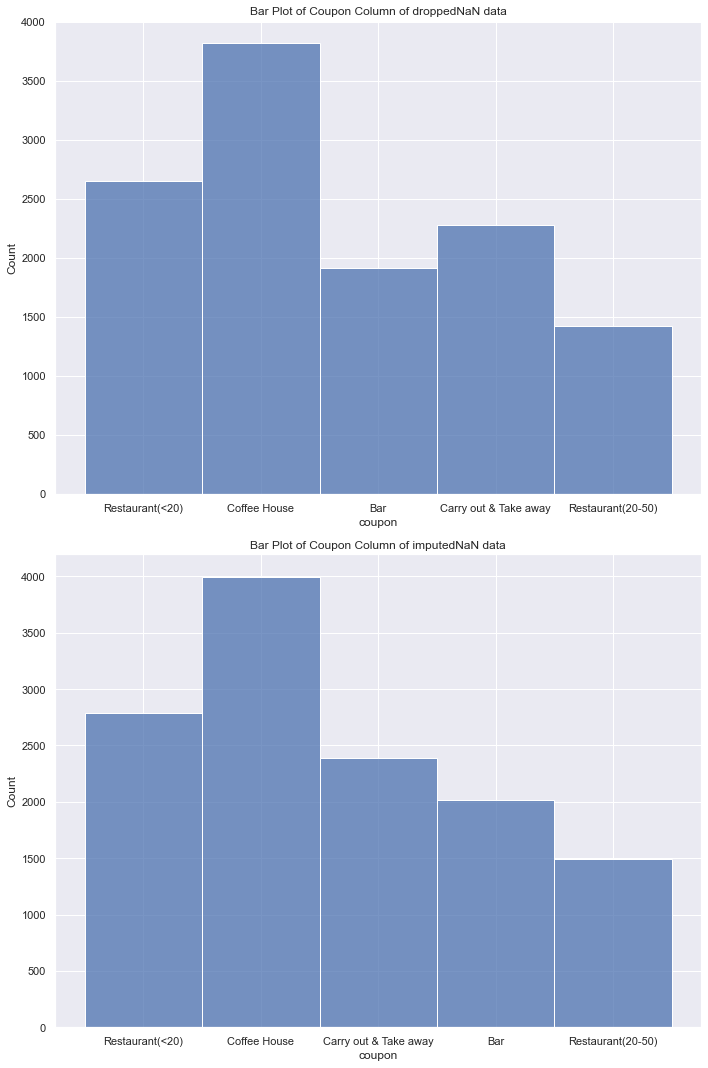

In [338]:
# Bar plot using Seaborn of Coupon column of the datasets with droppedNaN and imputedNan values
fig, couponbarplot = plt.subplots(2, 1,figsize=(10, 15))

# plt.figure(figsize=(20,10))
sns.histplot(ax = couponbarplot[0],data = datanocar, x='coupon').set(title = "Bar Plot of Coupon Column of droppedNaN data")

# plt.figure(figsize=(20,10))
sns.histplot(ax = couponbarplot[1],data = datanocarimpute, x='coupon').set(title = "Bar Plot of Coupon Column of imputedNaN data")

fig.tight_layout()

We find that among various types of coupons issued (Restaurent(<20), Coffee House, Carry out & Take away, Bar, Restaurent(20-50)), the count of Coffee House coupons are the highest followed by Restaurent(<20) coupons. The least number of coupon issued were of Bar and expensive restaurents (Restaurent(20-50)).

6. Use a histogram to visualize the temperature column.

array([55, 80, 30], dtype=int64)

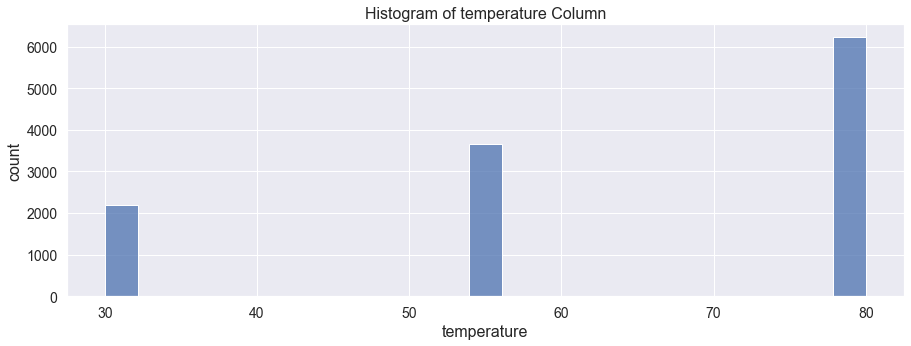

In [339]:
# Histogram using Seaborn of temperature column of the datasets with droppedNaN and imputedNan values
#The temperature column didnot have any NaN values. Hence the plot from any of the DF can be taken. 

temperature1= datanocar['temperature']
sns.histplot(x= temperature1).set(title = "Histogram of temperature Column")
sns.set(rc={'figure.figsize':(15,5)})
plt.xlabel('temperature', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.title('Histogram of temperature Column', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)

datanocar.temperature.unique()    #.unique() method of a series object retreives the unique values in the series

The histogram of temperature indicates that the temperatures in this dataset have specific unique values and not a continous value. Hence we use .unique() method for the series object "temperature" to retreive the unique values which we find to be 30, 55, and 80 F. These values have also been given in the begning in the description of the dataset. 

<b>Investigating Cofee House Coupons through Visualizations</b>

Independent Q1: Visualize coupon column using a bar plot (like in Q.5) to find/visualise the number of coupons issued for each unique category based on temperature.

Text(0.5, 1.0, 'Barplot of Coupon issued on different temperature(F) days')

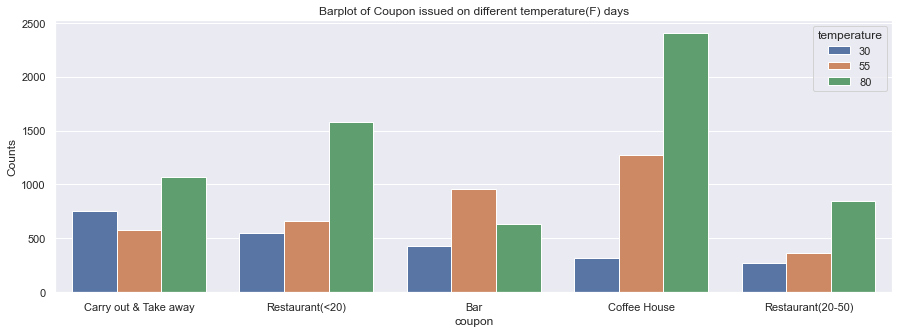

In [340]:
#Using seaborn to Visualize coupon column (coupon issued) based on Temperature (hue)
(datanocarimpute["coupon"]
 .groupby(datanocarimpute['temperature'])
 .value_counts()
 .rename('Counts')
 .reset_index()
 .pipe((sns.barplot, "data"), x='coupon', y='Counts', hue='temperature'))
plt.title("Barplot of Coupon issued on different temperature(F) days")


Looks like on hot days the proportion of coupons sent out for Coffee Houses are substantially high compared to other days. 
Moderate temperature days drive Bar coupons. It would be insightful to viusualize if the Coffee House coupons offered on hot days are used or not.

Independent Q2: Visualise the percentage(proportion) of coffee house coupon accepted that were issued on days 
               with different temperatures.
    

<AxesSubplot:title={'center':'Coffee coupons Rejection(0) vs Acceptance(1) issued on days with different temperatures'}, xlabel='temperature', ylabel='Acceptance/Rejection Percentage'>

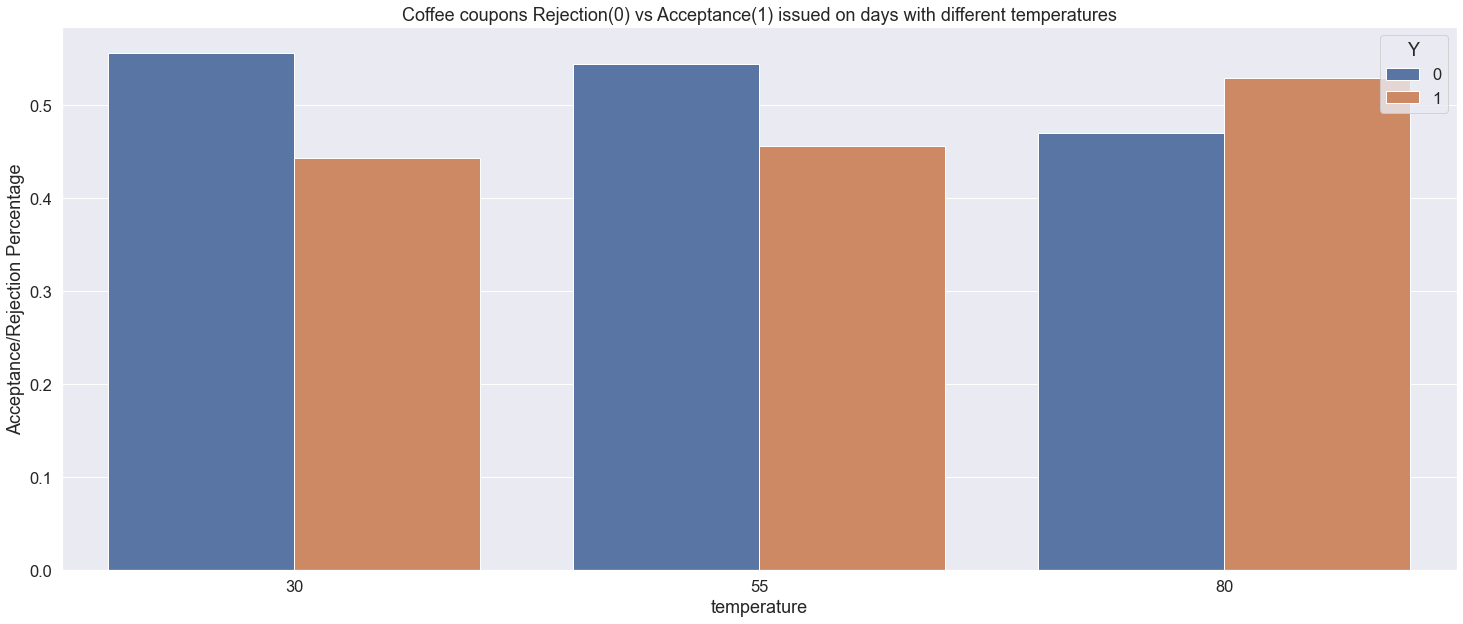

In [388]:
#Visualizaton to see the difference in rate of coupon acceptance that were isssued on days with different temperatures.
coffeeHouse_df = datanocarimpute.loc[(datanocarimpute['coupon']=='Coffee House')]  #Creating DF That has only Cofee House coupons
plt.title('Coffee coupons Rejection(0) vs Acceptance(1) issued on days with different temperatures')
sns.set(rc={"figure.figsize":(25, 10)})
sns.set(font_scale=1.5)
(coffeeHouse_df["Y"]
 .groupby(coffeeHouse_df['temperature'])
 .value_counts(normalize=True)
 .rename('Acceptance/Rejection Percentage')
 .reset_index()
 .pipe((sns.barplot, "data"), x='temperature', y='Acceptance/Rejection Percentage', hue='Y'))


Thus we find that in-spite of issuing more Coffee house coupons on hot days (80F) when compared to other days (with temperatures 30 and 55F), the rate of acceptance is higher on hot days. Hence as seen in the data set, issuing more coffeehouse coupon on hot days could lead to more percentage of coupons being utilized. We see a similar trend in Restarents(<20) coupons too, where more coupons are issued on hot days and we can perform a similar analysis to find if the chances of coupon being used is more on hot days than being rejected. 

Independednt Q3: Now, Find if there is difference between male and female drivers who accept and reject Coffee House coupons on Hot days (80F)

<AxesSubplot:title={'center':'Bar Plot of aceeptance/rejection of CoffeeHouse coupons on Hot days'}, xlabel='Y', ylabel='Acceptance Percentage'>

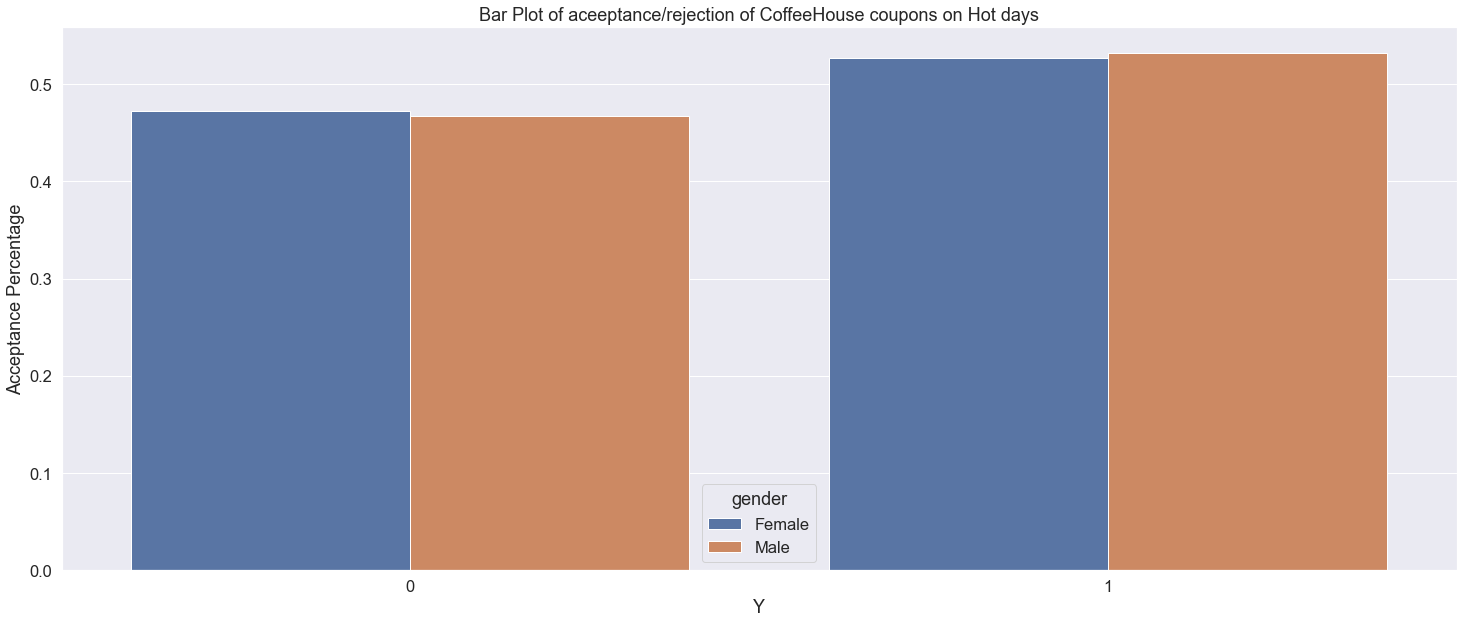

In [391]:
#Finding the rate of acceptace/ rejection of Cofee House coupons by Male/Female drivers on Hot day (80 F) through visualization

coffeeHouseHotDays_df = datanocarimpute.loc[(datanocarimpute['coupon']=='Coffee House') & (datanocarimpute['temperature']==80)]
plt.title('Bar Plot of aceeptance/rejection of CoffeeHouse coupons on Hot days')
(coffeeHouseHotDays_df["Y"]
 .groupby(coffeeHouseHotDays_df['gender'])
 .value_counts(normalize=True)
 .rename('Acceptance Percentage')
 .reset_index()
 .pipe((sns.barplot, "data"), x='Y', y='Acceptance Percentage', hue='gender'))

As we already know that the coffee house coupons are utilized more than rejected on hot days, we tried to find if the percentage of accepted/rejected coupon is contribute by Male or female drivers. We find that gender does not big contributing factor as both Male and Female drivers use the Coffee House coupon quite equally on hot days. Hence we can make a preliminary conclusion, Coffee-house coupon could be issued to both male and female drivers equally on hot days. However, we can do similar analysis to find if male or female accept coffee-house copon on days with other temperatures. 

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [389]:
#To create a subdataframe we use dropped NaN as there is only ~100 rown with NaN in bar column (<1%)
barcoupondf = datanocar.loc[datanocar['coupon']=='Bar']
print(barcoupondf.head())
print("The Subdtaframe containing data of only barcoupons is of size : ", barcoupondf.shape)

        destination  passanger weather  temperature  time coupon expiration  \
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   
39             Work      Alone   Sunny           55   7AM    Bar         1d   
46  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
57             Home      Alone   Sunny           55   6PM    Bar         1d   

   gender age maritalStatus  ...  CoffeeHouse CarryAway RestaurantLessThan20  \
24   Male  21        Single  ...        less1       4~8                  4~8   
35   Male  21        Single  ...        less1       4~8                  4~8   
39   Male  21        Single  ...        less1       4~8                  4~8   
46   Male  46        Single  ...          4~8       1~3                  1~3   
57   Male  46        Single  ...          4~8       1~3                  1~3   

   Restaurant20To50 toCoupon_GEQ5min toCoupo

2. What proportion of bar coupons were accepted?


In [139]:
#The method below in the first line prints out the no. of false and true like a matrix and [0],[1] 
#can be used to choose the values

#1 countsof_barcoupon = (barcoupondf['Y']==1).value_counts()
# print(countsof_barcoupon)
# False some no.
# True  some no.
#2 countsof_barcoupon_accepted = countsof_barcoupon.values.tolist()[1]
# print(countsof_barcoupon_accepted)

#Better way is to find the shape of the DF and select rows using [0]
barcoupon_shape = barcoupondf.shape
barcoupon_Y_shape = barcoupondf[barcoupondf['Y']==1].shape
print('The proportion of bar coupons that were accepted is :{0:.2%}'.format((barcoupon_Y_shape[0]/barcoupon_shape[0])))

The proportion of bar coupons that were accepted is :41.19%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


<b>Visualization to answer the question</b>

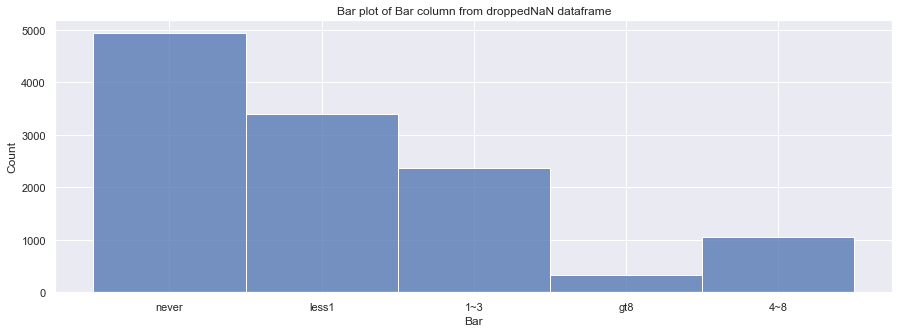

In [145]:
# Visualise Bar column to find the categories using Bar Plot"
barbplot = sns.histplot(data=datanocar, x='Bar').set(title="Bar plot of Bar column from droppedNaN dataframe")

<AxesSubplot:title={'center':'Bar plot of acceptance of any eatery coupom based various Bar visitor category'}, xlabel='Y', ylabel='Any Coupons Acceptance'>

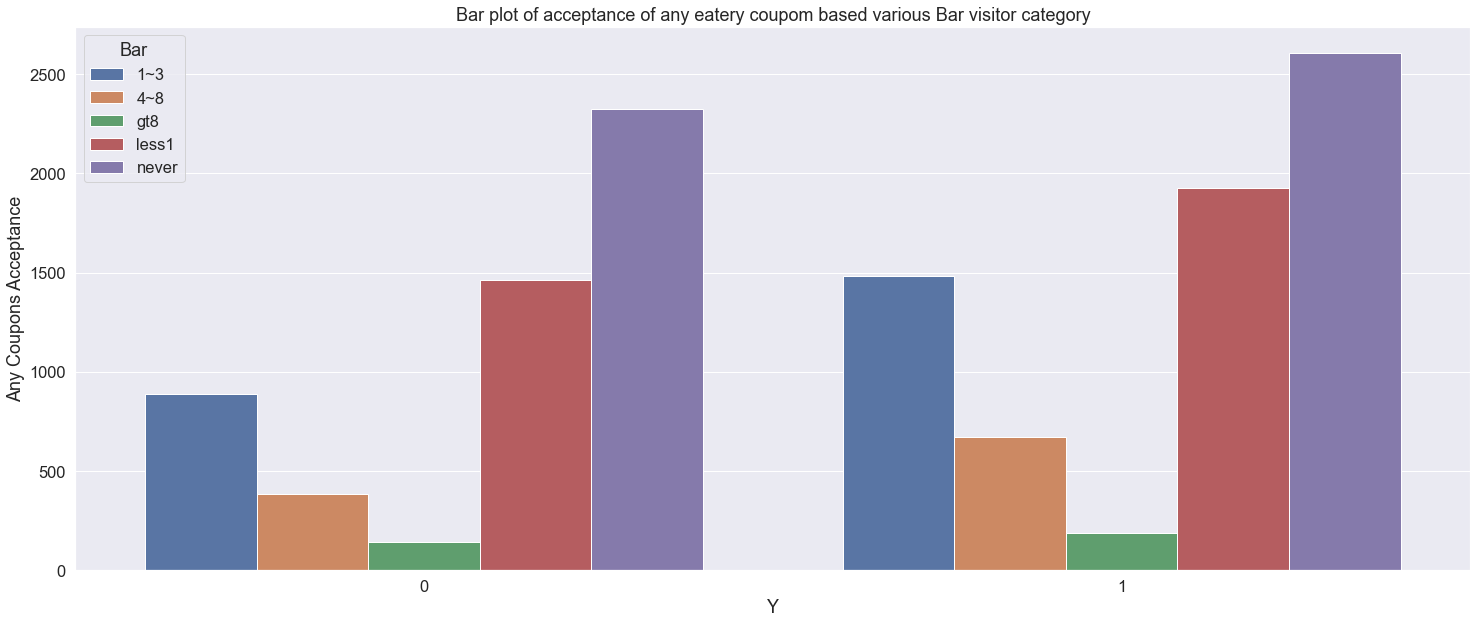

In [450]:
# Visualization of Any coupons acceptance rate by bar visit(s)
plt.title("Bar plot of acceptance of any eatery coupom based various Bar visitor category")
(datanocar["Y"]
 .groupby(datanocar['Bar'])
 .value_counts()
 .rename('Any Coupons Acceptance')
 .reset_index()
 .pipe((sns.barplot, "data"), x='Y', y='Any Coupons Acceptance', hue='Bar'))

Text(0.5, 1.0, 'Coupons acceptance by bar visits -fewer than 3 and more than 3')

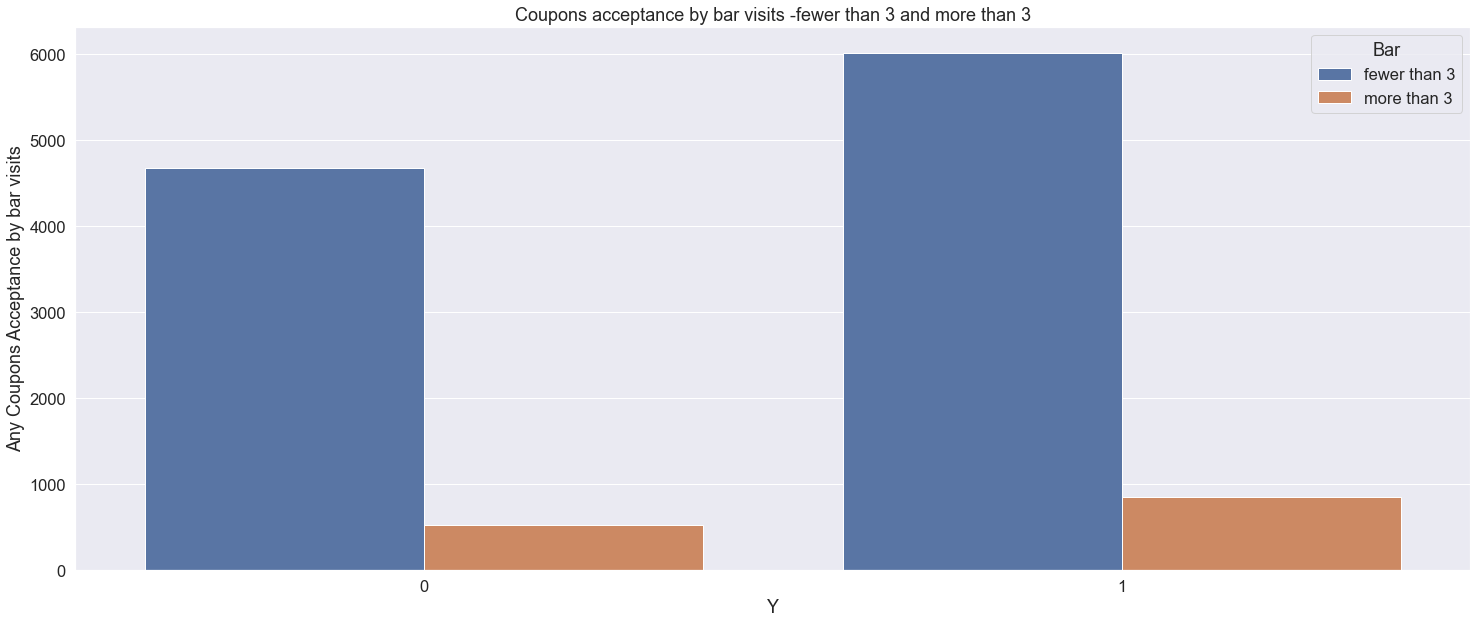

In [412]:
# Visualization of Any coupons acceptance rate by bar visit(s) 'fewer than 3' (1~3,less1,never) and 'more than 3' (4~8,gt8). 

#Step1 create a new DF with new column "Bar-3" where the unique value of Bar column are less3 (fewer than 3') and more3 ('more than 3')
collapsedBarDF = datanocar.copy()
newCol = collapsedBarDF.Bar.values                                    # values picks individual values of the series and 
                                                                      #in this stmnt each value refers to the variable it has been assigned to 
newCol[(newCol=='never') | (newCol=='less1') | (newCol=='1~3')] = 'fewer than 3' #this changes the Bar original column hence create a cpy of DF
newCol[(newCol=='4~8') | (newCol=='gt8')] = 'more than 3'                       #same as above statement

#Step2 Create the visualization
(collapsedBarDF["Y"]                   #X-axis of the plot is refered here
 .groupby(collapsedBarDF['Bar'])       #each value of x is categorized by bar column value
 .value_counts()                       #get value counts of individual categories 
 .rename('Any Coupons Acceptance Number by bar visits (less than 3 VS more than 3)') #name/label of y-axis(same as y in pipe)
 .reset_index()                         #always use this function
 .pipe((sns.barplot, "data"), x='Y', y='Any Coupons Acceptance Number by bar visits (less than 3 VS more than 3)', hue='Bar'))
plt.title('Coupons acceptance by bar visits -fewer than 3 and more than 3') #plt.title works as usual for this format

We see that the number of people who acceted the coupon of any eateries is much greater among people who went to bar less than 3 times a month. We also see that there is much more number of people in the whole dataset who go to bar fewer than thrice in a month. But in order find the rate of acceptance within each group we need to do some specific numerical analysis by finding 
It could be because the 

<b>Numerical Analysis to answer the Question</b>

In [160]:
# Count values of people who went to bar 3 or fewer times a month.
# threeorlessbarvisit_shape = datanocar[datanocar[(['Bar']=='never') & (['Bar']=='less1') & (['Bar']=='1~3')]].shape
threeorlessbarvisit_df = datanocar.loc[(datanocar['Bar']=='never') | (datanocar['Bar']=='less1') | (datanocar['Bar']=='1~3')]
threeorlessbarvisit_shape = threeorlessbarvisit_df.shape
print(threeorlessbarvisit_shape)
valueof3lessbarvisit = threeorlessbarvisit_shape[0]
print(valueof3lessbarvisit)

(10698, 25)
10698


In [237]:
#acceptance number of any coupon by ppl who went to bar 3 times or less
coupon_accepted = threeorlessbarvisit_df[threeorlessbarvisit_df['Y']==1].shape[0]
print(coupon_accepted)

6019


In [162]:
#acceptance rate of any coupon by ppl who went to bar 3 times or less is 
#aceptance number/value of these ppl (6019) divided by total of these ppl (10698)

couponacceptancerate = coupon_accepted/valueof3lessbarvisit
print('acceptance rate of any coupon those who went to a bar 3 or fewer times a month:{0:.2%}'.format(couponacceptancerate))

acceptance rate of any coupon those who went to a bar 3 or fewer times a month:56.26%


In [163]:
#Count values of people who went to bar more than 3 times a month.
morethan3barvisit_df = datanocar.loc[(datanocar['Bar']=='4~8') | (datanocar['Bar']=='gt8')]
morethan3barvisit_shape = morethan3barvisit_df.shape
print(morethan3barvisit_shape)
valueofmore3barvisit = morethan3barvisit_shape[0]
print(valueofmore3barvisit)

(1381, 25)
1381


In [164]:
#acceptance number of any coupon by ppl who went to bar 3 times or less
coupon_accepted3more = morethan3barvisit_df[morethan3barvisit_df['Y']==1].shape[0]
print(coupon_accepted3more)

858


In [165]:
#acceptance rate of any coupon by ppl who went to bar 3 times or less is 
#aceptance number/value of these ppl (1381) divided by total of these ppl (858)

couponacceptancerate1 = coupon_accepted3more/valueofmore3barvisit
print('acceptance rate of any coupon those who went to a bar more than 3 times a month:{0:.2%}'.format(couponacceptancerate1))



acceptance rate of any coupon those who went to a bar more than 3 times a month:62.13%


Comparing the acceptance rate of any coupons between people who vsited bar 3 or less time a month to those who visited bar more than 3 times a month, we find that the latter population comprised of 7% more people who would purchase coupons from any eatery. 

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Just like in the previous question(3), although a initial visualization would help us to get idea of the counts of coupon accepted and rejected by respective cohorts, numerical analysis of the data would lead to answering the question directly. Hence we skip the initial visualization and proceed to to the numerical analysis. 

In [179]:
#Count values of people who went to bar more than 1 times a month and who are older than 25.
morethan1barvisit_df_age25 = datanocar.loc[((datanocar['Bar']=='1~3') | (datanocar['Bar']=='4~8') | (datanocar['Bar']=='gt8')) & (datanocar['age']>'25')]
morethan1barvisit_df_age25_shape = morethan1barvisit_df_age25.shape
print(morethan1barvisit_df_age25_shape)
valueofmore1barvisit_age25 = morethan1barvisit_df_age25_shape[0]
print(valueofmore1barvisit_age25)

(2739, 25)
2739


In [186]:
#Count values of all other people
allOthers_df = datanocar.loc[list(set(datanocar.index.to_list())-set(morethan1barvisit_df_age25.index.to_list()))] #convert index to list and get the difference of 2 lists by converting it to set.
allOthers_df_shape = allOthers_df.shape
print(allOthers_df_shape)
valueofallOthers_df = allOthers_df_shape[0]
print(valueofallOthers_df)

(9340, 25)
9340


In [188]:
#acceptance number of any coupon by ppl who went to bar 1 times or more and are older than 25
coupon_morethan1barvisit_age25 = morethan1barvisit_df_age25[morethan1barvisit_df_age25['Y']==1].shape[0]
print('The number of people who went to bar more than once a month and were older than 25 and accepted coupons are:',coupon_morethan1barvisit_age25)

#acceptance rate of any coupon by ppl who went to bar 1 times or more and are  
#aceptance number/value of these ppl (1706) divided by total of these ppl (2739)

couponacceptancerate_morethan1barvisit_age25 = coupon_morethan1barvisit_age25/valueofmore1barvisit_age25
print('acceptance rate of any coupon those who went to a bar more than 1 times a month and are older than 25:{0:.2%}'.format(couponacceptancerate_morethan1barvisit_age25))

#acceptance number of any coupon of all other ppl
coupon_allOthers_df = allOthers_df[allOthers_df['Y']==1].shape[0]
print('The number of other people who accepted coupons are:',coupon_allOthers_df)

#acceptance rate of any coupon by all other ppl
#aceptance number/value of these ppl (1706) divided by total of these ppl (2739)

couponacceptancerate_allOthers = coupon_allOthers_df/valueofallOthers_df
print('acceptance rate of any coupon among all others:{0:.2%}'.format(couponacceptancerate_allOthers))


The number of people who went to bar more than once a month and were older than 25 and accepted coupons are: 1706
acceptance rate of any coupon those who went to a bar more than 1 times a month and are older than 25:62.29%
The number of other people who accepted coupons are: 5171
acceptance rate of any coupon among all others:55.36%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [189]:
datanocar.passanger.unique()

array(['Alone', 'Friend(s)', 'Kid(s)', 'Partner'], dtype=object)

In [190]:
datanocar.occupation.unique()

array(['Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Unemployed', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal', 'Retired',
       'Community & Social Services', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [195]:
#Count values of people who went to bar more than 1 times a month and had passengers 
# that were not a kid and had occupations other than farming, fishing, or forestry.
morethan1barvisit_passengerNotKid_df = datanocar.loc[((datanocar['Bar']=='1~3') | (datanocar['Bar']=='4~8') | (datanocar['Bar']=='gt8')) 
                                           & ((datanocar['passanger']=='Friend(s)') | (datanocar['passanger']=='Partner')) & 
                                            (datanocar['occupation']!='Farming Fishing & Forestry')]
morethan1barvisit_passengerNotKid_shape = morethan1barvisit_passengerNotKid_df.shape
print(morethan1barvisit_passengerNotKid_shape)
valueofmorethan1barvisit_passengerNotKid = morethan1barvisit_passengerNotKid_shape[0]
print('The number of people who visit bar more than once and had passengers who were not kid:',valueofmorethan1barvisit_passengerNotKid)

#Count values of all other people
allOthers_df = datanocar.loc[list(set(datanocar.index.to_list())-set(morethan1barvisit_passengerNotKid_df.index.to_list()))] #convert index to list and get the difference of 2 lists.
allOthers_df_shape = allOthers_df.shape
print(allOthers_df_shape)
valueofallOthers_df = allOthers_df_shape[0]
print('The number of people amongst all others are:',valueofallOthers_df)

#acceptance number of any coupon by ppl who went to bar more than 1 times a month and had passengers 
# that were not a kid and had occupations other than farming, fishing, or forestry.
coupon_morethan1barvisit_passengerNotKid = morethan1barvisit_passengerNotKid_df[morethan1barvisit_passengerNotKid_df['Y']==1].shape[0]
print('The number of people who went to bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry and accepted coupons are:'
      ,coupon_morethan1barvisit_passengerNotKid)

#acceptance rate of any coupon by ppl who went to bar more than 1 times a month and had passengers 
# that were not a kid and had occupations other than farming, fishing, or forestry.

couponacceptancerate_morethan1barvisit_passengerNotKid = coupon_morethan1barvisit_passengerNotKid/valueofmorethan1barvisit_passengerNotKid
print('acceptance rate of any coupon those who went to a bar more than 1 times a month and and had passengers that were not a kid and had occupations other than farming, fishing, or forestry and accepted coupons are:{0:.2%}'
      .format(couponacceptancerate_morethan1barvisit_passengerNotKid))

#acceptance number of any coupon of all other ppl
coupon_allOthers_df = allOthers_df[allOthers_df['Y']==1].shape[0]
print('The number of other people who accepted coupons are:',coupon_allOthers_df)

#acceptance rate of any coupon by all other ppl
#aceptance number/value of these ppl (1706) divided by total of these ppl (2739)

couponacceptancerate_allOthers = coupon_allOthers_df/valueofallOthers_df
print('acceptance rate of any coupon among all others:{0:.2%}'.format(couponacceptancerate_allOthers))

(1360, 25)
The number of people who visit bar more than once and had passengers who were not kid: 1360
(10719, 25)
The number of people amongst all others are: 10719
The number of people who went to bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry and accepted coupons are: 942
acceptance rate of any coupon those who went to a bar more than 1 times a month and and had passengers that were not a kid and had occupations other than farming, fishing, or forestry and accepted coupons are:69.26%
The number of other people who accepted coupons are: 5935
acceptance rate of any coupon among all others:55.37%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



<b>go to bars more than once a month, had passengers that were not a kid, and were not widowed </b>

In [206]:
#Count values of people who went to bar more than 1 times a month and had passengers 
# that were not a kid and had occupations other than farming, fishing, or forestry.
morethan1barvisit_passengerNotKidNotWidowed_df = datanocar.loc[((datanocar['Bar']=='1~3') | (datanocar['Bar']=='4~8') | (datanocar['Bar']=='gt8')) 
                                           & ((datanocar['passanger']=='Friend(s)') | (datanocar['passanger']=='Partner')) & 
                                            (datanocar['maritalStatus']!='Widowed')]
morethan1barvisit_passengerNotKidNotWidowed_shape = morethan1barvisit_passengerNotKidNotWidowed_df.shape
print(morethan1barvisit_passengerNotKidNotWidowed_shape)
valueofmorethan1barvisit_passengerNotKidNotWidowed = morethan1barvisit_passengerNotKidNotWidowed_shape[0]
print('The number of people who visit bar more than once and had passengers who were not kid:',valueofmorethan1barvisit_passengerNotKidNotWidowed)


(1360, 25)
The number of people who visit bar more than once and had passengers who were not kid: 1360


In [220]:
print('The number of times widowed people visit the bar is:',datanocar.loc[datanocar['maritalStatus']=='Widowed']['Bar'].unique())

array(['never', 'less1'], dtype=object)

The number of people who are widowed and visit the bar more than once is 0. This explains why the number of people who visit the bar and whose passengers are not kids and who are widowed matches that in the previous exploration.

In [222]:
#Count values of all other people
allOthers_df = datanocar.loc[list(set(datanocar.index.to_list())-set(morethan1barvisit_passengerNotKidNotWidowed_df.index.to_list()))] #convert index to list and get the difference of 2 lists.
allOthers_df_shape = allOthers_df.shape
print(allOthers_df_shape)
valueofallOthers_df = allOthers_df_shape[0]
print('The number of people amongst all others are:',valueofallOthers_df)

#acceptance number of any coupon by ppl who went to bar more than 1 times a month and had passengers 
# that were not a kid and had occupations other than farming, fishing, or forestry.
coupon_morethan1barvisit_passengerNotKidNotWidowed = morethan1barvisit_passengerNotKidNotWidowed_df[morethan1barvisit_passengerNotKidNotWidowed_df['Y']==1].shape[0]
print('The number of people who went to bar more than once a month and had passengers that were not a kid and were not widowed:'
      ,coupon_morethan1barvisit_passengerNotKid)

#acceptance rate of any coupon by ppl who went to bar more than 1 times a month and had passengers 
# that were not a kid and had occupations other than farming, fishing, or forestry.

couponacceptancerate_morethan1barvisit_passengerNotKid = coupon_morethan1barvisit_passengerNotKidNotWidowed/valueofmorethan1barvisit_passengerNotKidNotWidowed
print('acceptance rate of any coupon those who went to a bar more than 1 times a month and and had passengers that were not widowed:{0:.2%}'
      .format(couponacceptancerate_morethan1barvisit_passengerNotKid))

#acceptance number of any coupon of all other ppl
coupon_allOthers_df = allOthers_df[allOthers_df['Y']==1].shape[0]
print('The number of other people who accepted coupons are:',coupon_allOthers_df)

#acceptance rate of any coupon by all other ppl
#aceptance number/value of these ppl () divided by total of these ppl ()

couponacceptancerate_allOthers = coupon_allOthers_df/valueofallOthers_df
print('acceptance rate of any coupon among all others:{0:.2%}'.format(couponacceptancerate_allOthers))

(10719, 25)
The number of people amongst all others are: 10719
The number of people who went to bar more than once a month and had passengers that were not a kid and were not widowed: 942
acceptance rate of any coupon those who went to a bar more than 1 times a month and and had passengers that were not widowed:69.26%
The number of other people who accepted coupons are: 5935
acceptance rate of any coupon among all others:55.37%


<b>go to bars more than once a month and are under the age of 30</b>

In [224]:
#Count values of people who went to bar more than 1 times a month and had passengers 
# that were not a kid and had occupations other than farming, fishing, or forestry.
morethan1barvisit_ageUnder30_df = datanocar.loc[((datanocar['Bar']=='1~3') | (datanocar['Bar']=='4~8') | (datanocar['Bar']=='gt8')) 
                                           & (datanocar['age']<'30')]
morethan1barvisit_ageUnder30_shape = morethan1barvisit_ageUnder30_df.shape
print(morethan1barvisit_ageUnder30_shape)
valueofmorethan1barvisit_ageUnder30 = morethan1barvisit_ageUnder30_shape[0]
print('The number of people who visit bar more than once and had passengers who were not kid:',valueofmorethan1barvisit_ageUnder30)

#Count values of all other people
allOthers_df = datanocar.loc[list(set(datanocar.index.to_list())-set(morethan1barvisit_ageUnder30_df.index.to_list()))] #convert index to list and get the difference of 2 lists.
allOthers_df_shape = allOthers_df.shape
print(allOthers_df_shape)
valueofallOthers_df = allOthers_df_shape[0]
print('The number of people amongst all others are:',valueofallOthers_df)

#acceptance number of any coupon by ppl who went to bar more than 1 times a month and had passengers 
# that were not a kid and had occupations other than farming, fishing, or forestry.
coupon_morethan1barvisit_ageUnder30 = morethan1barvisit_ageUnder30_df[morethan1barvisit_ageUnder30_df['Y']==1].shape[0]
print('The number of people who went to bar more than once a month and were younger than 30:'
      ,coupon_morethan1barvisit_ageUnder30)

#acceptance rate of any coupon by ppl who went to bar more than 1 times a month and had passengers 
# that were not a kid and had occupations other than farming, fishing, or forestry.

couponacceptancerate_morethan1barvisit_ageUnder30 = coupon_morethan1barvisit_ageUnder30/valueofmorethan1barvisit_ageUnder30
print('acceptance rate of any coupon those who went to a bar more than 1 times a month and were younger than 30:{0:.2%}'
      .format(couponacceptancerate_morethan1barvisit_ageUnder30))

#acceptance number of any coupon of all other ppl
coupon_allOthers_df = allOthers_df[allOthers_df['Y']==1].shape[0]
print('The number of other people who accepted coupons are:',coupon_allOthers_df)

#acceptance rate of any coupon by all other ppl
#aceptance number/value of these ppl () divided by total of these ppl ()

couponacceptancerate_allOthers = coupon_allOthers_df/valueofallOthers_df
print('acceptance rate of any coupon among all others:{0:.2%}'.format(couponacceptancerate_allOthers))

(2103, 25)
The number of people who visit bar more than once and had passengers who were not kid: 2103
(9976, 25)
The number of people amongst all others are: 9976
The number of people who went to bar more than once a month and were younger than 30: 1324
acceptance rate of any coupon those who went to a bar more than 1 times a month and were younger than 30:62.96%
The number of other people who accepted coupons are: 5553
acceptance rate of any coupon among all others:55.66%


<b>go to cheap restaurants more than 4 times a month and income is less than 50K</b>

Text(0.5, 1.0, 'Coupons acceptance by restaurant visits -fewer than 4 and more than 4')

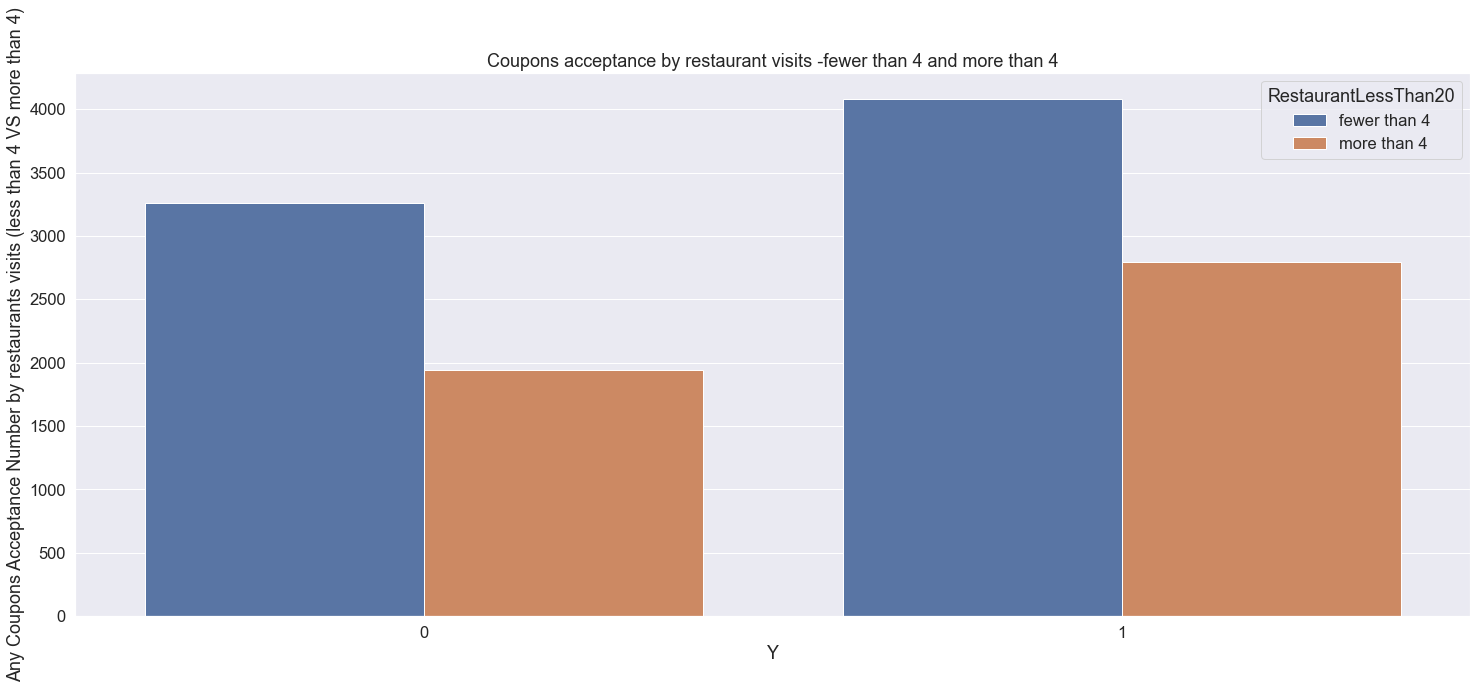

In [421]:
# create a dataframe which is a copy of datanocar to modify the restaurant less than 20 column

cheapRestaurantDF = datanocar.copy()
newCol = cheapRestaurantDF.RestaurantLessThan20.values
newCol[(newCol=='never') | (newCol=='less1') | (newCol=='1~3')] = 'fewer than 4'
newCol[(newCol=='4~8') | (newCol=='gt8')] = 'more than 4'

newCol = cheapRestaurantDF.income.values
newCol[(newCol=='$62500 - $74999') | (newCol=='$75000 - $87499') | (newCol=='$50000 - $62499')
      |(newCol=='$87500 - $99999') | (newCol=='$100000 or More')] = 'more than 50000'
newCol[(newCol=='Less than $12500') | (newCol=='$12500 - $24999')| (newCol=='$25000 - $37499')
      |(newCol=='$37500 - $49999')] = 'less than 50000'

(cheapRestaurantDF["Y"]                   #X-axis of the plot is refered here
 .groupby(cheapRestaurantDF['RestaurantLessThan20'])       #each value of x is categorized by bar column value
 .value_counts()                       #get value counts of individual categories 
 .rename('Any Coupons Acceptance Number by restaurants visits (less than 4 VS more than 4)') #name/label of y-axis(same as y in pipe)
 .reset_index()                         #always use this function
 .pipe((sns.barplot, "data"), x='Y', y='Any Coupons Acceptance Number by restaurants visits (less than 4 VS more than 4)', hue='RestaurantLessThan20'))
plt.title('Coupons acceptance by restaurant visits -fewer than 4 and more than 4') #plt.title works as usual for this format

The acceptance rate amongst drivers who visit cheap restaurants fewer than 4 times a week is around 56% and amongst drivers who visit such restaurants more than 4 times a week is around 57%. There does not seem to be a signifianct difference in acceptance of coupons between the two cohorts.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

From the above analysis and below independent investigation here are the findings:

1. People who went to bar more than three times were almost twice more likely to use the bar coupon compared to people who went to bar less than three times a month to bar when both the populations were issued bar coupon. 

2. The likelihood of people using coupon of any eatery(bar included) by people who went to bar less than 3 times is almost same as people who went to bar more than 3 times a month. However, among the people who went to bar less than three times a month there is 50% more likelihood them accepting an eatery coupon if there were issued with a mixture of any eatery coupon(including bar coupon) than just bar coupons. But among the the people who visit bar more than 3 times a month there isn't any difference in their acceptance of eatery or only bar coupon.

3. It was also observed that Coffee Shop coupons were offered much more on hot days - temperature ~ 80 F. On such cases - the rate of acceptance is higher. This analysis can also be extended to Cheap Restaurants.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

1. Compare the acceptance rate of bar coupons between those who went to a bar 3 or fewer times a month to those who went more.


<AxesSubplot:xlabel='Y', ylabel='No Bar Eateries Coupon Acceptance'>

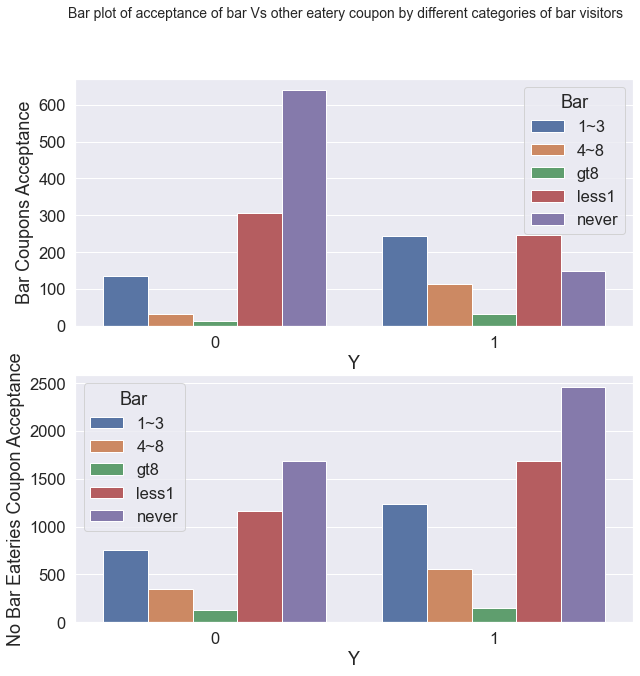

In [455]:
# Any coupons acceptance by bar visit
allOthers_df = datanocar.loc[list(set(datanocar.index.to_list())-set(barcoupondf.index.to_list()))] #convert index to list and get the difference of 2 lists.
#plt.title("Bar plot of acceptance of bar Vs other eatery coupon by diffrent categories of bar visitors")


fig, barcouponsacceptanceplt = plt.subplots(2, 1,figsize=(10, 10))

(barcoupondf["Y"]
 .groupby(barcoupondf['Bar'])
 .value_counts()
 .rename('Bar Coupons Acceptance')
 .reset_index()
 .pipe((sns.barplot, "data"), x='Y', y='Bar Coupons Acceptance', hue='Bar',ax = barcouponsacceptanceplt[0]))
fig.suptitle('Bar plot of acceptance of bar Vs other eatery coupon by different categories of bar visitors', fontsize=14)
(allOthers_df["Y"]
 .groupby(allOthers_df['Bar'])
 .value_counts()
 .rename('No Bar Eateries Coupon Acceptance')
 .reset_index()
 .pipe((sns.barplot, "data"), x='Y', y='No Bar Eateries Coupon Acceptance', hue='Bar',ax = barcouponsacceptanceplt[1]))


Sending bar coupons to drivers who never visit bars does not seem to tempt them in to accepting it. 

In [244]:
#COMPARISON OF PERCENTAGE OF BAR COUPON ACCEPTANCE OF PEOPLE WHO WENT TO BAR THRICE OR LESS VS WHO WENT MORE THAN THREE TIMES

#STEP 1 FINDING BAR COUPON ACCEPTANCE RATE OF PEOPLE WHO WENT TO BAR THRICE OR LESS
# People who went bar 3 or fewer times a month
threeorlessbarvisit_df       # DF with people who went to bar 3 or less times a month

# Df with people who were issued only bar coupons and who went to bar 3 or less times a month
barcoupon3orless_df = threeorlessbarvisit_df.loc[threeorlessbarvisit_df['coupon']=='Bar']

#Examine the DF created
print(barcoupon3orless_df.head()) 

#Shape of the DF created/Total number of ppl who were issued bar coupon and who went to bar less than 3 times
barcoupon3orless_df_shape = barcoupon3orless_df.shape
print('The shape of the DF with people who were issued only barcoupons and who went to bar 3 or fewer times is:', barcoupon3orless_df_shape)
print('The number of people who were issued bar coupon and who also went to bar thirce or less is:', barcoupon3orless_df_shape[0] )

#Finding how many of the people in above DF accepted the bar coupon issued to them
ppl_acceptedbarcoupon = barcoupon3orless_df[barcoupon3orless_df['Y']==1].shape[0]
print('The number of people who accepted the bar coupon and who also went to bar thrice or less is:',ppl_acceptedbarcoupon)

#Finding the percentage of people who accepted bar coupon from people who went to bar thrice or less and were issued a bar coupon
percentof_baracceptance = ppl_acceptedbarcoupon/barcoupon3orless_df_shape[0]
print('The percentage of people who accepted bar coupon among who went to bar thrice or less and were issued a bar coupon is:{0:.2%}'.format(percentof_baracceptance))

#STEP 2 FINDING BAR COUPON ACCEPTANCE RATE OF PEOPLE WHO WENT TO BAR MORE THAN THRICE 
# People who went to bar more than 3 times a month
morethan3barvisit_df        # DF with people who went to bar more than 3 times a month

# Df with people who were issued only bar coupons and who went to bar more than 3 times a month
barcouponmore3_df = morethan3barvisit_df.loc[morethan3barvisit_df['coupon']=='Bar']

#Examine the DF created
print(barcouponmore3_df.head())

#Shape of the DF created/Total number of ppl who were issued bar coupon and who went to bar more than 3 times
barcouponmore3_df_shape = barcouponmore3_df.shape
print('The shape of the DF with people who were issued only barcoupons and who went to bar more than 3 times is:', barcouponmore3_df_shape)
print('The number of people who were issued bar coupon and who also went to bar more than thrice is:', barcouponmore3_df_shape[0])

#Finding how many of the people in above DF accepted the bar coupon issued to them
ppl_acceptedbarcoupon1 = barcouponmore3_df[barcouponmore3_df['Y']==1].shape[0]
print('The number of people who accepted the bar coupon and who also went to bar more than thrice is:',ppl_acceptedbarcoupon1)

#Finding the percentage of people who accepted bar coupon from people who went to bar more than thrice and were issued a bar coupon
percentof_baracceptance1 = ppl_acceptedbarcoupon1/barcouponmore3_df_shape[0]
print('The percentage of people who accepted bar coupon among who went to bar more than thrice and were issued a bar coupon is:{0:.2%}'.format(percentof_baracceptance1))



        destination  passanger weather  temperature  time coupon expiration  \
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   
39             Work      Alone   Sunny           55   7AM    Bar         1d   
46  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
57             Home      Alone   Sunny           55   6PM    Bar         1d   

   gender age maritalStatus  ...  CoffeeHouse CarryAway RestaurantLessThan20  \
24   Male  21        Single  ...        less1       4~8                  4~8   
35   Male  21        Single  ...        less1       4~8                  4~8   
39   Male  21        Single  ...        less1       4~8                  4~8   
46   Male  46        Single  ...          4~8       1~3                  1~3   
57   Male  46        Single  ...          4~8       1~3                  1~3   

   Restaurant20To50 toCoupon_GEQ5min toCoupo

From the above analysis we find that people who went to bar more than three times were almost twice more likely to use the bar coupon compared to people who went to bar less than three times a month to bar when both the populations were issued bar coupon. 

Also, from our previous analysis we know that the likelihood of people using coupon of any eatery(bar included) by people who went to bar less than 3 times is almost same as people who went to bar more than 3 times a month. However, among the people who went to bar less than three times a month there is 50% more likelihood them accepting an eatery coupon if there were issued with a mixture of any eatery coupon(including bar coupon) than just bar coupons. But among the the people who visit bar more than 3 times a month there isn't any difference in their acceptance of eatery or only bar coupon. 

Thus, we can make a preliminary conclusion that among the target audience of bar goers, the people who visit bar less than three times show a higher preference towards eateries coupon than bar coupons compared to no such particular preference among people who visit bar more than thrice a month. 

2. Compare the acceptance rate of bar coupons between drivers who go to a bar more than once a month and are over the age of 25 to the all others. Is there a difference?

In [251]:
#COMPARISON OF PERCENTAGE OF BAR COUPON ACCEPTANCE OF PEOPLE ABOVE 25 YEARS AND MORE THAN ONE VISIT TO BAR VS ALL OTHERS.
#ALL OTHERS COMPRISES OF ENTIRE POPUTAION WHO ARE NOT IN THE ABOVE GROUP (i.e. ppl above 25 and go to bar more than once)

#STEP 1 FINDING BAR COUPON ACCEPTANCE RATE OF PEOPLE WHO WENT TO BAR MORE THAN ONCE AND ARE ABOVE 25 YERAS AGE. 
#ppl who went to bar more than once a month and were above age 25.
morethan1barvisit_df_age25     # DF with people who went to bar more than once and were above age 25.

# Df with people who were issued only bar coupons and who went to bar more than once and were above age 25.
barcoupon_more1more25_df = morethan1barvisit_df_age25.loc[morethan1barvisit_df_age25['coupon']=='Bar']

#Examine the DF created
print(barcoupon_more1more25_df.head())

#Shape of the DF created/Total number of ppl who were issued bar coupon and who went to bar less than 3 times
barcoupon_more1more25_df_shape = barcoupon_more1more25_df.shape
print('The shape of the DF with people who were issued only barcoupons and who went to bar more than once and were above 25 years is:', barcoupon_more1more25_df_shape)
print('The number of people who were issued bar coupon and who also went to bar more than once and were above 25 years is:', barcoupon_more1more25_df_shape[0] )

#Finding how many of the people in above DF accepted the bar coupon issued to them
ppl25_acceptedbarcoupon = barcoupon_more1more25_df[barcoupon_more1more25_df['Y']==1].shape[0]
print('The number of people who accepted the bar coupon and who also went to bar thrice or less is:',ppl_acceptedbarcoupon)

#Finding the percentage of people who accepted bar coupon from people who went to bar more than once and were above age 25 and were issued a bar coupon
percentof_baracceptance25 = ppl25_acceptedbarcoupon/barcoupon_more1more25_df_shape[0]
print('The percentage of people who accepted bar coupon among who went to bar more than once and above age 25 and were issued a bar coupon is:{0:.2%}'.format(percentof_baracceptance25))

#STEP 2 FINDING BAR COUPON ACCEPTANCE RATE OF 'ALL OTHER' PEOPLE (i.e ppl excluding WHO WENT TO BAR MORE THAN ONCE AND ARE ABOVE 25 YERAS AGE).
#ppl who didnot go to bar more than once and are not above 25
allOthers_df    # DF containing all other people obtained by subtracting (people who go to bar more than once and are above 25)
                # from original DF (datanocar)

#DF of 'all other' people who were issued bar coupon.
barcoupon_allOthers25_df = allOthers_df.loc[allOthers_df['coupon']=='Bar']

#Examine the DF created
print(barcoupon_allOthers25_df.head())

#Shape of the DF created/Total number of 'all other' ppl who were issued bar coupon 
barcoupon_allOthers25_df_shape = barcoupon_allOthers25_df.shape
print('The shape of the DF with "all other" people who were issued only barcoupons is:', barcoupon_allOthers25_df_shape)
print('The number of "all other" people who were issued bar coupon is:', barcoupon_allOthers25_df_shape[0])

#Finding how many of the people in above DF accepted the bar coupon issued to them
allothers25_acceptedbarcoupon = barcoupon_allOthers25_df[barcoupon_allOthers25_df['Y']==1].shape[0]
print('The number of "all others" people who accepted the bar coupon is:',allothers25_acceptedbarcoupon)

#Finding the percentage of "all others" people who accepted bar coupon ("all others" accepted bar coupon/"all others" issued bar coupon)
percentof_baracceptance_allOthers25 = allothers25_acceptedbarcoupon/barcoupon_allOthers25_df_shape[0]
print('The percentage of people who accepted bar coupon among "all others" is:{0:.2%}'.format(percentof_baracceptance_allOthers25))

         destination  passanger weather  temperature  time coupon expiration  \
112  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
123             Home      Alone   Sunny           55   6PM    Bar         1d   
127             Work      Alone   Sunny           55   7AM    Bar         1d   
156  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
167             Home      Alone   Sunny           55   6PM    Bar         1d   

    gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
112   Male  26  Unmarried partner  ...          gt8       4~8   
123   Male  26  Unmarried partner  ...          gt8       4~8   
127   Male  26  Unmarried partner  ...          gt8       4~8   
156   Male  26             Single  ...          gt8       gt8   
167   Male  26             Single  ...          gt8       gt8   

    RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
112                  1~3            less1       

Further analysing to see if there is difference in preference of acceptance of bar Vs any eateries coupon among bar going population, we tried to find the percentage of acceptance of bar coupons among people who are more than 25 years of age and who would visit bar more than once a month and compare it rest of the population. We find that the former sub-group has a preference to utilize bar coupon (68.28%) nearly twice as all others (34.86%) in the population. From our previous analysis of the same subgroup to utilize coupons of any eatery shows similar percentage of coupon acceptance (62.29%). However the population excluding our sub-group in analysis shows nearly twice the preference to utilize coupon of all eateries (55.36%) than acceptance of just bar coupons (34.86%).

Thus, we can make preliminary conclusions that people who dont visit bar more than once a month and are less than 25 years of age have a higher (nearly twice) preference towards any eateries coupon while the sub-group that is 25 years and older and visits bar more than once has no such difference in  preference of acceptance towards bar or any eateries coupon.

Future Recommendations:
    
    1. Visualizations:
        - covariance matrix and correlation table between numeric and categorical variables using pair plots.
        - contribution of age in using coupons.
    2. Statistical Analysis:
        - If raw income data is retrieved instead of bins, a distribution of the income can be made.
    3. Numerical analysis:
        - Finding if any variables are interacting from above and their effect on acceptance of various types of coupons.
